In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# reading the data from csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# just making sure if there are any duplicate rows, they are dropped.
df.drop_duplicates(inplace=True)

# dropping the columns I am not going to use for my analysis.
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

# we know there are missing values, so lets check for those
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

<p>As you can see there are still missing values in the 4 columns.
<p>There are less missing values in <font color=red>director</font> and <font color=red>genres</font> so we can drop those rows as we won't loose much data.

In [5]:
df.dropna(subset=['director', 'genres'], inplace=True)

In [6]:
df.query('runtime == 0').count()['id']

28

In [7]:
df.query('runtime != 0', inplace=True)

In [8]:
df.query('budget == 0')

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015
72,284289,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015
88,301875,1.959765,0,2000000,Equals,Drake Doremus,illustrator|sex scene|near future|infected|emo...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,135,5.6,2015
95,258509,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Walt Becker,chipmunk|cgi|talking animal|aftercreditsstinge...,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,278,5.7,2015
100,326359,1.724712,0,0,Frozen Fever,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015
101,254302,1.661789,0,0,High-Rise,Ben Wheatley,skyscraper|high rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,161,5.4,2015
103,292040,1.646664,0,0,Spooks: The Greater Good,Bharat Nalluri,corruption|terrorist|explosive|police|kidnapping,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,114,5.6,2015


In [9]:
df.query('revenue == 0')

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,Wild Card,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.4,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015
93,307663,1.872696,10000000,0,Vice,Brian A Miller,artificial intelligence|android|self-awareness...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,181,4.1,2015
100,326359,1.724712,0,0,Frozen Fever,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015
101,254302,1.661789,0,0,High-Rise,Ben Wheatley,skyscraper|high rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,161,5.4,2015
103,292040,1.646664,0,0,Spooks: The Greater Good,Bharat Nalluri,corruption|terrorist|explosive|police|kidnapping,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,114,5.6,2015
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,Mike Elliott,magic|fantasy|steampunk|dragon,105,Action|Fantasy|Adventure,Universal Pictures,22,4.5,2015
122,277355,1.342839,0,0,Everly,Joe Lynch,assassin|mob boss,90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,169,5.1,2015


In [10]:
# replacing zero values with NAN values so there wont be any errors in statistical computations
df['budget'] = df['budget'].replace(0, np.NAN)
df['revenue'] = df['revenue'].replace(0, np.NAN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10865
Data columns (total 13 columns):
id                      10772 non-null int64
popularity              10772 non-null float64
budget                  5161 non-null float64
revenue                 4848 non-null float64
original_title          10772 non-null object
director                10772 non-null object
keywords                9338 non-null object
runtime                 10772 non-null int64
genres                  10772 non-null object
production_companies    9793 non-null object
vote_count              10772 non-null int64
vote_average            10772 non-null float64
release_year            10772 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 967.8+ KB


<p> Now you can clearly see that there are so many missing values in the <font color=red>revenue</font> and <font color=red>budget</font> columns.

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10772.000000,10772.000000,5.161000e+03,4.848000e+03,10772.000000,10772.000000,10772.000000,10772.000000
mean,65282.304029,0.650643,3.078261e+07,8.925500e+07,102.455347,219.114463,5.972289,2001.265503
std,91452.460328,1.003319,3.891911e+07,1.620930e+08,30.379156,577.826118,0.932877,12.825332
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10558.500000,0.209987,6.000000e+06,7.724244e+06,90.000000,17.000000,5.400000,1995.000000
50%,20408.500000,0.386176,1.700000e+07,3.187604e+07,99.000000,39.000000,6.000000,2006.000000
75%,74462.000000,0.718889,4.000000e+07,9.997431e+07,112.000000,147.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


## Exploratory Data Analysis


### Q1. How the runtime of movies is affected over years? Does it have to do anything with popularity?

First, let us look for the runtimes of the movies over the years.
Using 'groupby' method of the pandas, calculating mean of the runtime of movies per year.

In [12]:
runtime_info = df.groupby(['release_year'])['runtime'].mean()

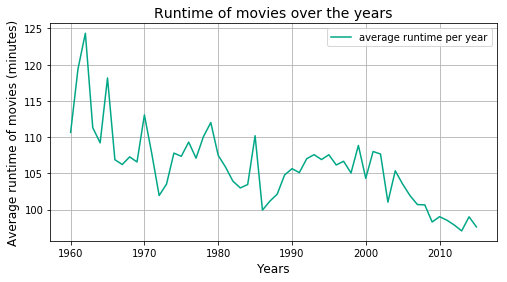

In [75]:
plt.figure(figsize=(8,4))
plt.plot(runtime_info.index, runtime_info.values, label='average runtime per year', color='#00a787');
plt.title('Runtime of movies over the years', size=14)
plt.xlabel('Years', size=12)
plt.ylabel('Average runtime of movies (minutes)', size=12)
plt.legend()
plt.grid()

From the above graph we can see that over time the runtime has decreased, not significantly but it has(upto 30-35 mins of runtime).
The decrease in runtime could aslo mean that in modern days people don't prefer watching long movies much.

<hr>
Now lets take a look at popularity of the movies over the years.
For that lets calculate popularity mean of movies per each year using 'groupby' method of pandas

In [14]:
pop_info = df.groupby(['release_year'])['popularity'].mean()

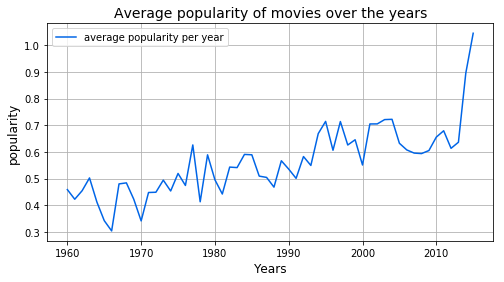

In [76]:
plt.figure(figsize=(8,4))
plt.plot(pop_info.index, pop_info.values, label='average popularity per year', color='#0065e7');
plt.title('Average popularity of movies over the years', size=14)
plt.xlabel('Years', size=12)
plt.ylabel('popularity', size=12)
plt.legend()
plt.grid()

The above graph clearly shows that the popularity of the movies have increased significantly over the time.

<hr>
Both the attributes above i.e. "popularity" and "runtime" are affected over time.

Now lets look at them simultaneously to get proper insights.

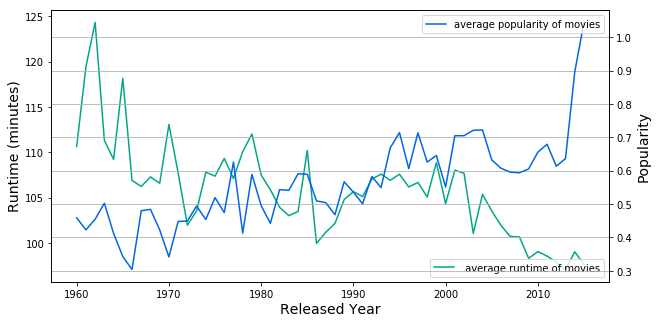

In [74]:
fig, ax1 = plt.subplots(figsize=(10,5))

# plot for the runtime over years
ax1.plot(runtime_info.index, runtime_info.values, color='#00a787', label=' average runtime of movies');
ax1.set_xlabel('Released Year', size=14)
ax1.set_ylabel('Runtime (minutes)', size=14)
ax1.legend(loc=4)

ax2 = ax1.twinx()

# plot for the popularity over years
ax2.plot(pop_info.index, pop_info.values, color='#0065e7', label='average popularity of movies');
ax2.set_ylabel('Popularity', size=14)
ax2.legend(loc=1)
plt.grid()

The above graph does tells us that both are related as lower the runtime higher the popularity, but that assumption can be wrong as there is little decrease in runtime and we havent considered other attributes like genres which could affect the popularity highly over the years.

### Q2. Did the number of movies released is increasing by years?

#### Lets try to count the number of movies released in each year.

In [17]:
movies_by_yrs = df.groupby(['release_year'])['id'].count()

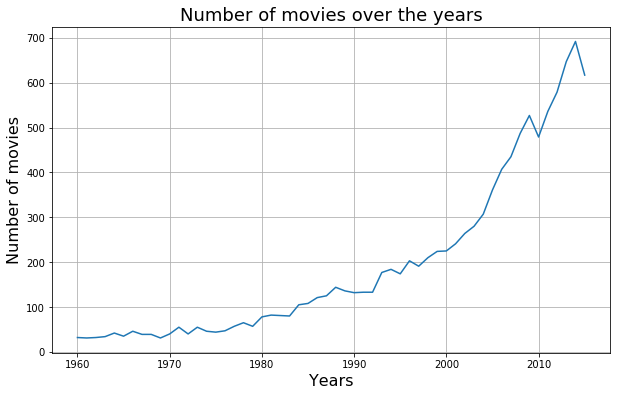

In [18]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(movies_by_yrs.index, movies_by_yrs.values)
plt.title('Number of movies over the years', size=18)
plt.xlabel('Years', size=16)
plt.ylabel('Number of movies', size=16);

### Q3. Which are the trending genres of all time?

#### First lets get all the unique genres from all the rows.

In [19]:
genre_types = []
temp_gen = []

for genre in df['genres']:
    if '|' in genre:
        temp_gen = genre.split('|')
        for gen in temp_gen:
            if gen not in genre_types:
                genre_types.append(gen)
    elif genre not in genre_types:
        genre_types.append(i)

genre_types

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

#### Approach to calculate how many number of movies belongs to particular genre.

Made new columns for each genre whose value show that if the movie falls under a particular genre.

In [20]:
genredf = pd.DataFrame()

for gen in genre_types:
    genredf[gen] = df['genres'].apply(lambda x: True if gen in x else False)

gen_dict = {}
for gen in genre_types:
    gen_dict[gen] = genredf[gen].value_counts()[1]

genre, gen_values = list(gen_dict.keys()), list(gen_dict.values())

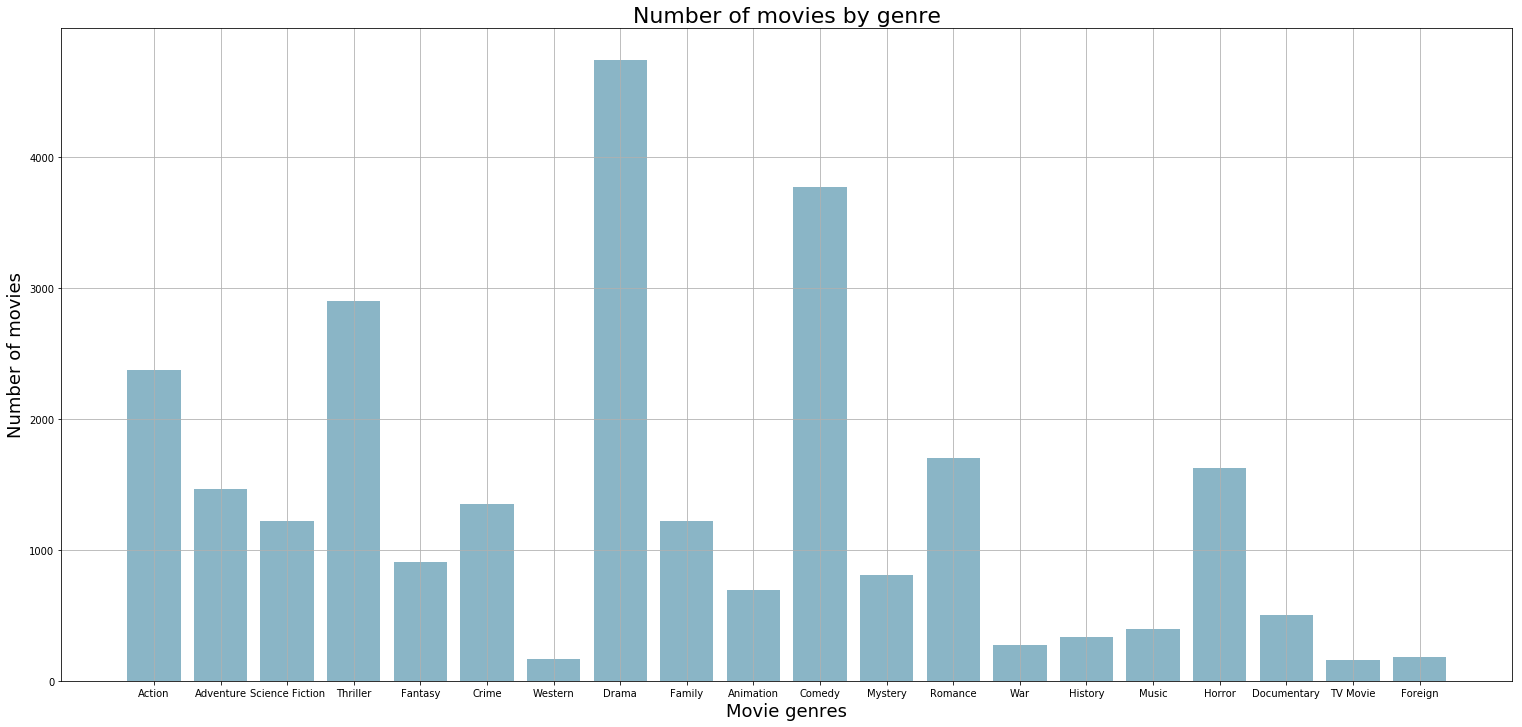

In [72]:
plt.figure(figsize=(26,12))
plt.grid()

y_pos = np.arange(len(genre))

plt.bar(y_pos, gen_values, align='center', alpha=0.5, color='#176d8f')
plt.xticks(y_pos, genre)
plt.title('Number of movies by genre', size=22)
plt.xlabel('Movie genres', size=18)
plt.ylabel('Number of movies', size=18);

From the above graph we can see that the top 5 most popular genres over all the years (1960-2015) are
<ol>
    <li>Drama
    <li>Comdey
    <li>Thriller
    <li>Action
    <li>Romance
</ol>

#### Now lets look at revenues and budgets of the movies.

### Q4. How are budgets and revenue affected over years as popularity of movies is incresing as we saw above?

In [68]:
revenue_info = df.groupby(['release_year']).revenue.mean()
budget_info = df.groupby(['release_year']).budget.mean()

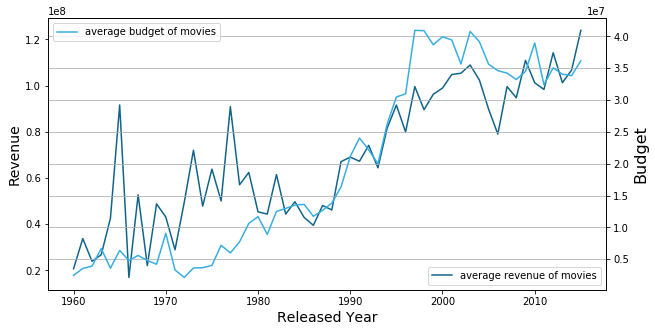

In [69]:
fig, ax1 = plt.subplots(figsize=(10,5))

# plot for the movie revenue over years
ax1.plot(revenue_info.index, revenue_info.values, color='#106389', label='average revenue of movies');
ax1.set_xlabel('Released Year', size=14)
ax1.set_ylabel('Revenue', size=14)
ax1.legend(loc=4)

ax2 = ax1.twinx()

# plot for the movie budget over years
ax2.plot(budget_info.index, budget_info.values, color='#37aee1', label='average budget of movies')
ax2.set_ylabel('Budget', size=16);
ax2.legend(loc=2)
plt.grid()

https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb